---
# **Sharpe and Sortino Ratios**


Esta função é destinada ao cálculo análise dos índices Sharpe e Sortino, que são métricas amplamente usadas na avaliação de desempenho de investimentos, ajustadas pelo risco. Esta função também plota os índices Sharpe e Sortino, juntamente com a performance de vários tickers financeiros. Ela cria visualizações interativas para ajudar a analisar os retornos ajustados pelo risco de diferentes investimentos ao longo do tempo.

This function is intended for the calculation and analysis of the Sharpe and Sortino ratios, which are widely used metrics in evaluating the performance of investments adjusted for risk. This function also plots the Sharpe and Sortino ratios, along with the performance of various financial tickers. It creates interactive visualizations to help analyze the risk-adjusted returns of different investments over time.

#### Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. It is calculated as:

$\textbf{Sharpe ratio} = \frac{R_{a} - R_{f}}{\sigma_{a}}$

where:<br>
$R_{a}$ = Expected portfolio return<br>
$R_{f}$ = Risk-free rate<br>
$\sigma_{a}$ = Portfolio standard deviation (volatility)<br>

#### Sortino Ratio
The Sortino Ratio is a variation of the Sharpe Ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative asset returns (downside deviation) instead of the total standard deviation of portfolio returns. It is calculated as:

$\textbf{Sortino ratio} = \frac{R_{a} - R_{f}}{\sigma_{d}}$

where:<br>
$R_{a}$ = Expected portfolio return<br>
$R_{f}$ = Risk-free rate<br>
$\sigma_{d}$ = Downside deviation<br>


$\textbf{The Sharpe ratio is used more to evaluate low-volatility investment portfolios, and the Sortino variation is used more to evaluate high-volatility portfolios (bull markets).}$

# 1. Libraries - Install and Import




In [ ]:
!pip install quantstats
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Get Data

In [ ]:
def get_data(tickers, start_date, end_date):
  data = yf.download(tickers, start = start_date, end = end_date)[['Close']]
  return data

In [ ]:
data = get_data(['BTC-USD', '^GSPC'], '2018-01-02', '2024-01-06')
data.columns = ['BTC', 'S&P500']


[*********************100%%**********************]  2 of 2 completed


In [ ]:
data_norm = data/data.iloc[0]
data_norm

,BTC,S&P500
Date,,
2018-01-02,1.000000,1.000000
2018-01-03,1.014611,1.006399
2018-01-04,1.041189,1.010453
2018-01-05,1.163355,1.017561
2018-01-06,1.169863,NaN
...,...,...
2024-01-01,2.948007,NaN
2024-01-02,3.000779,1.759334
2024-01-03,2.859958,1.745231


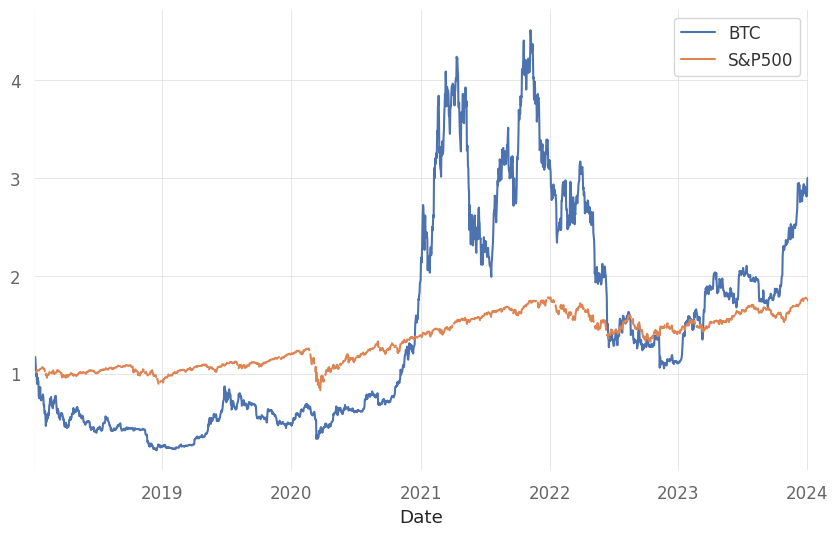

In [ ]:
data_norm.plot();

# 3. Metrics Analysis

The quantstats library provides an interesting calculation of these indices' variation using a rolling function (approximately 126 days for a semester) similar to pandas.

Here, we calculate the Sharpe and Sortino ratios considering a risk-free rate of 5% per semester.

In [ ]:
def get_sharpe_sortino(data, rf):
  for i in range(len(data.columns)):
    data[data.columns[i]+'_sharpe'] = qs.stats.rolling_sharpe(data[data.columns[i]], rf = rf)
    data[data.columns[i]+'_sortino'] = qs.stats.rolling_sortino(data[data.columns[i]], rf = rf)


  return data


In [ ]:
data = get_sharpe_sortino(data, 0.05)
data.dropna(inplace = True)
data.head()

,BTC,S&P500,BTC_sharpe,BTC_sortino,S&P500_sharpe,S&P500_sortino
Date,,,,,,
2018-05-07,9373.009766,2672.629883,-0.740232,-0.987889,-0.663677,-0.831115
2018-05-08,9234.820312,2671.919922,-0.773756,-1.032286,-0.667103,-0.835392
2018-05-09,9325.179688,2697.790039,-0.784923,-1.046991,-0.623353,-0.782335
2018-05-10,9043.940430,2723.070068,-0.913730,-1.216068,-0.552928,-0.696013
2018-05-11,8441.490234,2727.719971,-1.352982,-1.757192,-0.622499,-0.782079


Let's look at the correlation between the two Bitcoin (BTC) indices in a scatter plot.

In [ ]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                    'x': data['BTC_sharpe'],
                    'y': data['BTC_sortino'],
                    'mode': 'markers',
                    'line':{'color':'blue'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                        margin=dict(l=70, r=20, t=20, b=70),
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

In [ ]:
def pearson_correlation(data, *tickers):
  for ticker in tickers:
    corr, p = stats.pearsonr(data[f'{ticker}_sharpe'], data[f'{ticker}_sortino'])
    print(f'Pearson Correlation - {ticker}, r=%.3f' %corr, 'p=%.3f' %p)

pearson_correlation(data, 'BTC', 'S&P500')


Pearson Correlation - BTC, r=0.989 p=0.000
Pearson Correlation - S&P500, r=0.994 p=0.000


With such a high correlation, would it be possible to gain any insights by comparing the two risk indicators?

The high Pearson correlation indicates a strong linear relationship between two variables. The Pearson correlation is measured on a scale from -1 to 1:

Pearson correlation close to 1: Indicates a strong positive correlation. This means that as one variable increases, the other variable also tends to increase.

Pearson correlation close to -1: Indicates a strong negative correlation. This means that as one variable increases, the other variable tends to decrease.

Pearson correlation close to 0: Indicates little to no linear correlation between the variables. This means that there is no clear linear relationship between the variables.








In [ ]:
def plot_sharpe_sortino(data, *tickers):
    for ticker in tickers:
      fig = make_subplots(specs=[[{"secondary_y": True}]])

      # Columns to be used
      sharpe_col = f"{ticker}_sharpe"
      sortino_col = f"{ticker}_sortino"
      ticker_col = ticker

    # Checking if the columns exist in the DataFrame
      if sharpe_col in data.columns:
          fig.add_trace(go.Scatter(
              x=data.index,
              y=data[sharpe_col],
              name=sharpe_col,
              line=dict(color='blue', width=2)),
              secondary_y=False
          )
      else:
          print(f"Column {sharpe_col} not found in the data")

      if sortino_col in data.columns:
          fig.add_trace(go.Scatter(
              x=data.index,
              y=data[sortino_col],
              name=sortino_col,
              line=dict(color='green', width=2)),
              secondary_y=False
          )
      else:
          print(f"Column {sortino_col} not found in the data")

      if ticker_col in data.columns:
          fig.add_trace(go.Scatter(
              x=data.index,
              y=np.log(data[ticker_col]),
              name=ticker_col,
              line=dict(color='black', width=2)),
              secondary_y=True
          )
      else:
          print(f"Column {ticker_col} not found in the data")

      # Updating plot layout
      fig.update_layout(
          title=f'Sharpe and Sortino Ratios with {ticker} Performance',
          xaxis_title='Date',
          yaxis_title='Ratios',
          yaxis2_title='Log Scale (Ticker Value)'
      )

      # Displaying the plot
      fig.show()

# Example usage:
# Ensure that `data` is a DataFrame containing the columns 'BTC_sharpe', 'BTC_sortino', and 'BTC'
plot_sharpe_sortino(data, *('BTC', 'S&P500'))